# EJERCICIO 1 - PRACTICA 3

In [172]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import lambdify

# establece variables a usar en la funcion
x, y= symbols('x y', real=True)

# define la funcion
f = x/(2*x**2 + 3*y*y + 1)
f

x/(2*x**2 + 3*y**2 + 1)

### Calculo la funcion derivada parcial 

In [175]:
# derivada parcial respecto a x:

df_dx = diff(f, x)
df_dx

-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)

In [177]:
# derivada parcial respecto a x:

df_dy = diff(f, y)
df_dy

-6*x*y/(2*x**2 + 3*y**2 + 1)**2

### grafico de la funcion

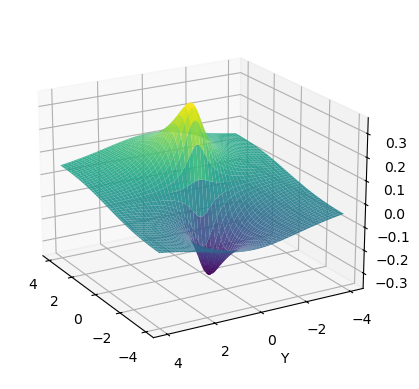

In [180]:
# Malla de puntos para graficar
X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X, Y)
Z = lambdify((x, y), f, 'numpy')(X, Y)

# Graficar
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=20, azim=150)  # Puedes ajustar los valores de elev y azim para cambiar la vista
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)

ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


# GRADIENTE ∇f(x,y)=( ∂f/∂x , ∂f/∂y ) --> apunta siempre en la direccion de mayor crecimiento de la funcion 

### Verificación del Gradiente

In [184]:
# coordenadas del punto a calcular
(px, py) = (1, -1)

# evalua la funcion f en x e y
pz = f.evalf(subs = {x:px, y:py}) #
print("\nDada la función f(x,y) = ", f)
print("  en (%f,%f) vale %f\n" % (px, py, pz) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz1 = df_dx.evalf(subs = {x:px, y:py} )
print(" - La derivada respecto de x es", df_dx )
print("   y en (%f,%f) vale %f\n" % (px, py, pz1) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz2 = df_dy.evalf(subs = {x:px,y:py} )
print(" - La derivada respecto de y es", df_dy)
print("   y en (%f,%f) vale %f\n" % (px, py, pz2) )

print("el gradiente en (-1,1) es: (%f,%f) " % (pz1,pz2) )


Dada la función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
  en (1.000000,-1.000000) vale 0.166667

 - La derivada respecto de x es -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
   y en (1.000000,-1.000000) vale 0.055556

 - La derivada respecto de y es -6*x*y/(2*x**2 + 3*y**2 + 1)**2
   y en (1.000000,-1.000000) vale 0.166667

el gradiente en (-1,1) es: (0.055556,0.166667) 


### Si a partir de (𝑥 = 0.20; 𝑦 = −1) tuviera que elegir una dirección en la cual la función crezca, qué acción tomaría?


In [41]:
(px, py) = (0.20, -1)

#  calculo el gradiente en x= 0.20 y= -1 :
# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz1 = df_dx.evalf(subs = {x:px, y:py} )
print(" - La derivada respecto de x es", df_dx )
print("   y en (%f,%f) vale %f\n" % (px, py, pz1) )

# evalua la derivada de la funcion f respecto de x en el punto (x e y)
pz2 = df_dy.evalf(subs = {x:px,y:py} )
print(" - La derivada respecto de y es", df_dy)
print("   y en (%f,%f) vale %f\n" % (px, py, pz2) )

print("el gradiente en (%f,%f) es: (%f,%f) " % (px,py,pz1,pz2) )


 - La derivada respecto de x es -4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)
   y en (1.000000,0.500000) vale -0.017778

 - La derivada respecto de y es -6*x*y/(2*x**2 + 3*y**2 + 1)**2
   y en (1.000000,0.500000) vale -0.213333

el gradiente en (1.000000,0.500000) es: (-0.017778,-0.213333) 


## segun el gradiente, para que la funcion crezca debo aumentar las coordenadas x e y
## porque  ∂f(0.20, -1)/∂x > 0.20 , ∂f(0.20, -1)/∂y > -1

### -------------

## Una vez elegida la dirección, el movimiento a realizar será una fracción del módulo del vector  gradiente. ¿Cuál sería la nueva posición si se considera 𝑎𝑙𝑓𝑎 = 0.1? ¿cuál es el valor de la función en la nueva ubicación?

In [39]:
print("Derivada parcial respecto a x en (%f,%f): %f" % (px, py, df_dx.evalf(subs={x: px, y: py})))
print("Derivada parcial respecto a y en (%f,%f): %f" % (px, py, df_dy.evalf(subs={x: px, y: py})))


Derivada parcial respecto a x en (0.100000,0.500000): 0.552204
Derivada parcial respecto a y en (0.100000,0.500000): -0.095758


In [194]:
# la función crece en dirección al gradiente
rx = px+0.01*df_dx.evalf(subs = {x:px,y:py}) # mueve las coordenadas (px, py) en la dirección del gradiente con un paso de 0.1
ry = py+0.01*df_dy.evalf(subs = {x:px,y:py})
rz = f.evalf(subs = {x:rx, y:ry}) #  calculas el nuevo valor de la función 𝑓  despues de haberse movido en la direcc del gradiente

# El valor 0.1 es un factor de escala o tamaño de paso, que permite controlar qué tan lejos se mueve la funcion en la dirección del gradiente.

print("\nLa función f(x,y) = ", f)
print(" en (%f,%f) vale %f" % (px, py, pz) )
print(" ")
print("valor de la funcion en la nueva ubicacion:")
print(" en (%f,%f) vale %f (crece)" % (rx, ry, rz) )



La función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
 en (0.200000,-1.000000) vale 0.166667
 
valor de la funcion en la nueva ubicacion:
 en (0.202355,-0.999279) vale 0.049626 (crece)


### -------------

## ahora debe buscar una dirección, a partir de (𝑥 = 0.20; 𝑦 = −1), en la cual la función disminuya ¿cuál sería su elección?
## seria la direccion opuesta al gradiente --> disminuir x , diminuir y

In [198]:
# la función decrece en dirección OPUESTA al gradiente
rx = px-0.01*df_dx.evalf(subs = {x:px,y:py}) # mueve las coordenadas (px, py) en la dirección opuesta del gradiente con un paso de 0.1
ry = py-0.01*df_dy.evalf(subs = {x:px,y:py})
rz = f.evalf(subs = {x:rx, y:ry}) #  calcula el nuevo valor de la función 𝑓  despues de haberse movido 

# El valor 0.1 es un factor de escala o tamaño de paso, que permite controlar qué tan lejos se mueve la funcion en la dirección del gradiente.

print("\nLa función f(x,y) = ", f)
print(" en (%f,%f) vale %f" % (px, py, pz) )
print(" ")
print("valor de la funcion en la nueva ubicacion:")
print(" en (%f,%f) vale %f (decrece)" % (rx, ry, rz) )



La función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
 en (0.200000,-1.000000) vale 0.166667
 
valor de la funcion en la nueva ubicacion:
 en (0.197645,-1.000721) vale 0.048413 (decrece)


## -----------

## Utilice la técnica del descenso de gradiente para calcular el valor y la ubicación del mínimo de la función 𝑓(𝑥, 𝑦) que se observa en la figura.

## calcular el minimo de la funcion --> descenso del gradiente

In [203]:
alpha = 0.1
iterations = 100
px = 0.2
py = -1

In [205]:
for i in range (iterations):

    #evaluo las derivadas parciales en el punto actual --> GRADIENTE
    grad_x = df_dx.evalf(subs={x:px, y:py})
    grad_y = df_dy.evalf(subs={x:px, y:py})

    #actualizo las coordenadas en la direccion OPUESTA al gradiente (por eso se resta)
    px = px - alpha * grad_x
    py = py - alpha * grad_y

    #evaluar la funcion en el nuevo punto
    f_val = f.evalf(subs={x:px, y:py})

    #iteracion 
    print(f' Iteracion {i+1}, la funcion f(x,y) = {f_val}')


print( " ")
print (f'Resultado final: X= %f , Y= %f', (px,py) )
print ('valor minimo de la funcion f(%f,%f) = %f' , (px,py,f_val) )

 Iteracion 1, la funcion f(x,y) = 0.0429773928670840
 Iteracion 2, la funcion f(x,y) = 0.0370194103587587
 Iteracion 3, la funcion f(x,y) = 0.0311350643354632
 Iteracion 4, la funcion f(x,y) = 0.0253139466138573
 Iteracion 5, la funcion f(x,y) = 0.0195458287840791
 Iteracion 6, la funcion f(x,y) = 0.0138206482422196
 Iteracion 7, la funcion f(x,y) = 0.00812848986044787
 Iteracion 8, la funcion f(x,y) = 0.00245956458031902
 Iteracion 9, la funcion f(x,y) = -0.00319581401016542
 Iteracion 10, la funcion f(x,y) = -0.00884725422006535
 Iteracion 11, la funcion f(x,y) = -0.0145043111357729
 Iteracion 12, la funcion f(x,y) = -0.0201765111184033
 Iteracion 13, la funcion f(x,y) = -0.0258733752187094
 Iteracion 14, la funcion f(x,y) = -0.0316044407877958
 Iteracion 15, la funcion f(x,y) = -0.0373792804980087
 Iteracion 16, la funcion f(x,y) = -0.0432075178816452
 Iteracion 17, la funcion f(x,y) = -0.0490988383432256
 Iteracion 18, la funcion f(x,y) = -0.0550629944005258
 Iteracion 19, la funci

## ahora calcular el maximo de la funcion --> aumento del gradiente

In [208]:
alpha = 0.1
iterations = 100
px = 0.2 # valores aleatorios de x e y para empezar
py = -1

In [210]:
for i in range (iterations):

    #evaluo las derivadas parciales en el punto actual --> GRADIENTE
    grad_x = df_dx.evalf(subs={x:px, y:py})
    grad_y = df_dy.evalf(subs={x:px, y:py})

    #actualizo las coordenadas en la direccion OPUESTA al gradiente (por eso se resta)
    px = px + alpha * grad_x
    py = py + alpha * grad_y

    #evaluar la funcion en el nuevo punto
    f_val = f.evalf(subs={x:px, y:py})

    #iteracion 
    print(f' Iteracion {i+1}, la funcion f(x,y) = {f_val}')


print( " ")
print (f'Resultado final: X= %f , Y= %f', (px,py) )
print ('valor minimo de la funcion f(%f,%f) = %f' , (px,py,f_val) )

 Iteracion 1, la funcion f(x,y) = 0.0551039757815892
 Iteracion 2, la funcion f(x,y) = 0.0612725146601039
 Iteracion 3, la funcion f(x,y) = 0.0675354587128124
 Iteracion 4, la funcion f(x,y) = 0.0739030578778700
 Iteracion 5, la funcion f(x,y) = 0.0803855363855555
 Iteracion 6, la funcion f(x,y) = 0.0869930326055980
 Iteracion 7, la funcion f(x,y) = 0.0937355161071546
 Iteracion 8, la funcion f(x,y) = 0.100622677231735
 Iteracion 9, la funcion f(x,y) = 0.107663783815995
 Iteracion 10, la funcion f(x,y) = 0.114867499084065
 Iteracion 11, la funcion f(x,y) = 0.122241654246321
 Iteracion 12, la funcion f(x,y) = 0.129792969124580
 Iteracion 13, la funcion f(x,y) = 0.137526714359055
 Iteracion 14, la funcion f(x,y) = 0.145446309693037
 Iteracion 15, la funcion f(x,y) = 0.153552854803922
 Iteracion 16, la funcion f(x,y) = 0.161844592551202
 Iteracion 17, la funcion f(x,y) = 0.170316309788562
 Iteracion 18, la funcion f(x,y) = 0.178958688475897
 Iteracion 19, la funcion f(x,y) = 0.18775763005

### ----------------- cuestionario

In [30]:
from sympy import symbols, diff

# establece variables a usar en la funcion
x, y= symbols('x y', real=True) 

# define la funcion
f = x/(2*x**2 + 3*y*y + 1)
f

px=1
py=0.5

#funcion evaluada en x=1, y=0.5
pz = f.evalf(subs = {x:px, y:py})
print('f(1, 0.5) = ', rz)

f(1, 0.5) =  0.271236835137652


#### calculo el vector gradiente en (1, 0.5):

In [18]:
# derivada parcial respecto a x:

df_dx = diff(f, x)
df_dx

-4*x**2/(2*x**2 + 3*y**2 + 1)**2 + 1/(2*x**2 + 3*y**2 + 1)

In [20]:
# derivada parcial respecto a x:

df_dy = diff(f, y)
df_dy

-6*x*y/(2*x**2 + 3*y**2 + 1)**2

In [22]:
print("Derivada parcial respecto a x en (%f,%f): %f" % (px, py, df_dx.evalf(subs={x: px, y: py})))
print("Derivada parcial respecto a y en (%f,%f): %f" % (px, py, df_dy.evalf(subs={x: px, y: py})))

Derivada parcial respecto a x en (1.000000,0.500000): -0.017778
Derivada parcial respecto a y en (1.000000,0.500000): -0.213333


#### calculo el valor de la funcion en los nuevos ptos con un alfa=0.10

In [32]:
# la función crece en dirección al gradiente
rx = px+0.10*df_dx.evalf(subs = {x:px,y:py}) # mueve las coordenadas (px, py) en la dirección del gradiente con un paso de 0.1
ry = py+0.10*df_dy.evalf(subs = {x:px,y:py})
rz = f.evalf(subs = {x:rx, y:ry}) #  calculas el nuevo valor de la función 𝑓  despues de haberse movido en la direcc del gradiente

# El valor 0.1 es un factor de escala o tamaño de paso, que permite controlar qué tan lejos se mueve la funcion en la dirección del gradiente.

print("\nLa función f(x,y) = ", f)
print(" en (%f,%f) vale %f" % (px, py, pz) )
print(" ")
print("valor de la funcion en la nueva ubicacion:")
print(" en (%f,%f) vale %f (crece)" % (rx, ry, rz) )


La función f(x,y) =  x/(2*x**2 + 3*y**2 + 1)
 en (1.000000,0.500000) vale 0.266667
 
valor de la funcion en la nueva ubicacion:
 en (0.998222,0.478667) vale 0.271237 (crece)
